### 1.) Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = [20,8]

from sklearn.preprocessing import LabelEncoder

### 2.) Read the data

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [4]:
df.shape

(12330, 18)

### 3.) EDA

#### a.) Check for Missing values

In [5]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### b.) Check for data types

In [6]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### 4.) Encoding

In [7]:
le = LabelEncoder()

df["Month"] = le.fit_transform(df["Month"])

df["VisitorType"] =  le.fit_transform(df["VisitorType"])

df["Weekend"] =  le.fit_transform(df["Weekend"])

df["Revenue"] =  le.fit_transform(df["Revenue"])

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


### 5.) Outliers

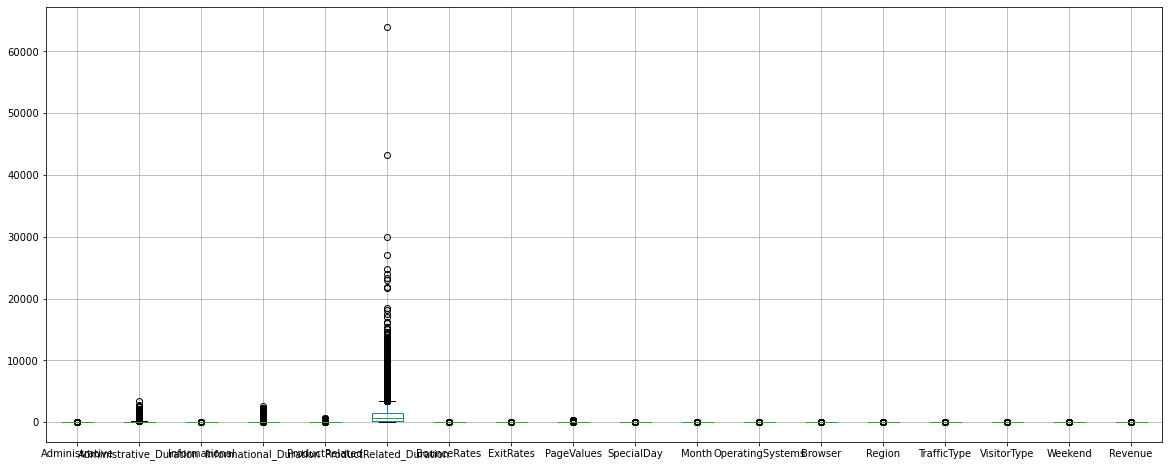

In [9]:
df.boxplot();

`ProductRelated_Duration` variable is having more outliers

### 6.) Scaling

In [10]:
sc = StandardScaler()

df_sc = sc.fit_transform(df)

df_sc = pd.DataFrame(df_sc, columns=df.columns)

df_sc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.894178,-0.762629,0.407786,-0.550552,-0.427872
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.514182,0.407786,-0.550552,-0.427872
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,2.058618,-0.790293,2.437081,-0.265735,0.407786,-0.550552,-0.427872
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.334959,0.961270,-0.207952,-0.477771,-0.017289,0.407786,-0.550552,-0.427872
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360,-0.427872


### 7.) Algorithms

## i.) K means 

In [11]:
from sklearn.cluster import KMeans

#### A.) Elbow plot

In [12]:
error = []

for i in range(1,10):
    km = KMeans(n_clusters=i, random_state=100)
    km.fit(df_sc)
    error.append(km.inertia_)

In [13]:
error

[221940.0,
 197751.8990487914,
 177885.37441212634,
 164193.1519124912,
 154869.85679325735,
 147732.20561318807,
 139186.02898976154,
 133410.43792884238,
 128965.19211728014]

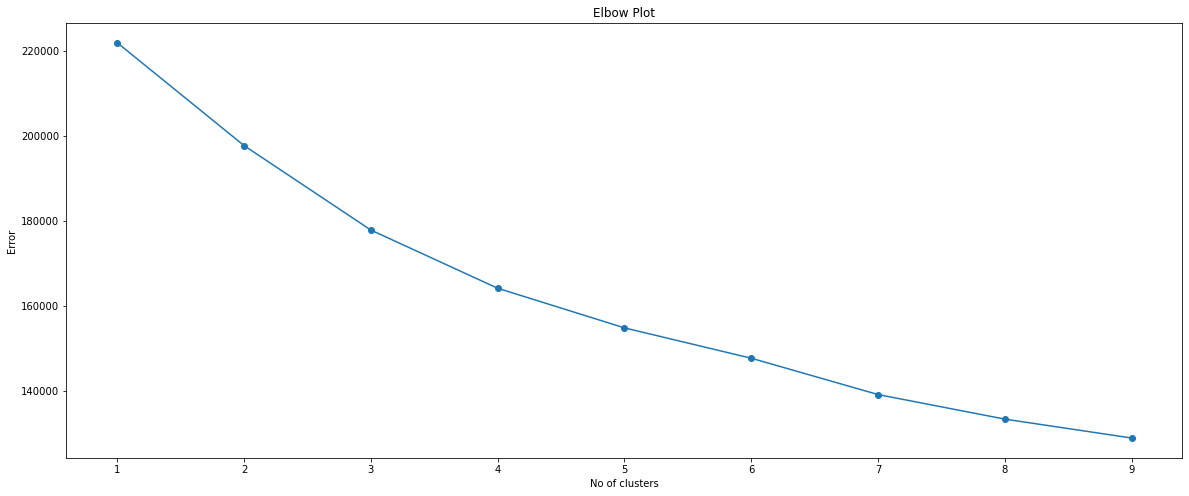

In [14]:
plt.plot(range(1,10), error, marker="o")

plt.xlabel("No of clusters")
plt.ylabel("Error")
plt.title("Elbow Plot")
plt.show()

In [15]:
# From the graph, k = 3. So, Build a model using 8

In [16]:
model_3 = KMeans(n_clusters=3, random_state=100)

model_3.fit(df_sc)

KMeans(n_clusters=3, random_state=100)

In [17]:
df_sc["labels"] = model_3.labels_

In [18]:
df_sc["labels"].value_counts() 

2    9611
0    1655
1    1064
Name: labels, dtype: int64

In [19]:
df_sc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,labels
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.894178,-0.762629,0.407786,-0.550552,-0.427872,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.514182,0.407786,-0.550552,-0.427872,2
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,2.058618,-0.790293,2.437081,-0.265735,0.407786,-0.550552,-0.427872,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.334959,0.961270,-0.207952,-0.477771,-0.017289,0.407786,-0.550552,-0.427872,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360,-0.427872,2


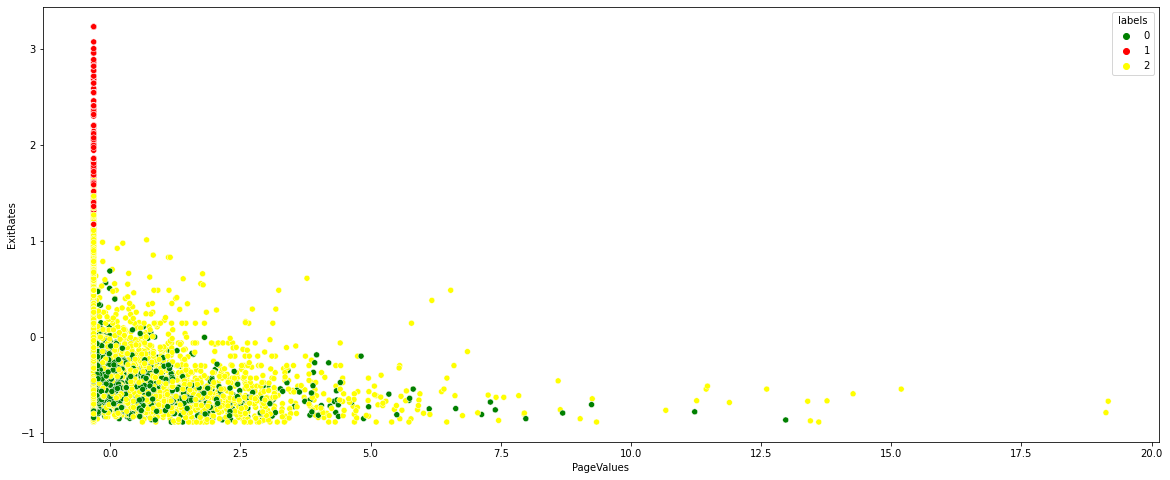

In [20]:
sns.scatterplot(x=df_sc["PageValues"], y=df_sc["ExitRates"],
               hue = df_sc["labels"],
               palette=["green","red","yellow"])
plt.show()

#### B.) Silhouette score

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import silhouette_score

In [22]:
for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=100)
    km.fit(df_sc)
    sil_score = silhouette_score(df_sc, km.labels_)
    print("Silhouette score for ", i, "clusters", round(sil_score,4))

Silhouette score for  2 clusters 0.3063
Silhouette score for  3 clusters 0.2497
Silhouette score for  4 clusters 0.1714
Silhouette score for  5 clusters 0.1982
Silhouette score for  6 clusters 0.1914
Silhouette score for  7 clusters 0.1979
Silhouette score for  8 clusters 0.1535
Silhouette score for  9 clusters 0.1579


From the Silhouette score, k=2

Silhouette score for  2 cluster 0.3063


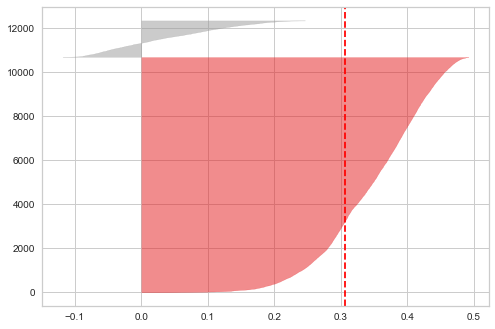

In [23]:
km = KMeans(n_clusters=2, random_state=100)
km.fit(df_sc)
sil_score = silhouette_score(df_sc, km.labels_)
print("Silhouette score for ",2, "cluster", round(sil_score,4))

viz = SilhouetteVisualizer(km)
viz.fit(df_sc)
plt.show()

## ii.) density based 

In [24]:
from sklearn.cluster import AgglomerativeClustering

from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import silhouette_score

In [25]:
db_inde = df.drop("Revenue", axis=1)
db_inde.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1


In [26]:
db_inde_sc = sc.fit_transform(db_inde)

db_inde_sc = pd.DataFrame(db_inde_sc, columns=db_inde.columns)

db_inde_sc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.894178,-0.762629,0.407786,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.514182,0.407786,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,2.058618,-0.790293,2.437081,-0.265735,0.407786,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.334959,0.961270,-0.207952,-0.477771,-0.017289,0.407786,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360


#### A.) Elbow plot

In [27]:
error = []

for i in range(1,15):
    km = KMeans(n_clusters=i, random_state=100)
    km.fit(db_inde_sc)
    error.append(km.inertia_)

In [28]:
error

[209610.00000000003,
 185774.3594980273,
 166000.54947364583,
 153941.82870479455,
 145654.40249359192,
 136758.64686867144,
 130852.70421372322,
 124340.07261700871,
 118973.31669058559,
 114072.59504088834,
 108965.39722192578,
 104777.36875043224,
 102178.54056640064,
 98736.35665342136]

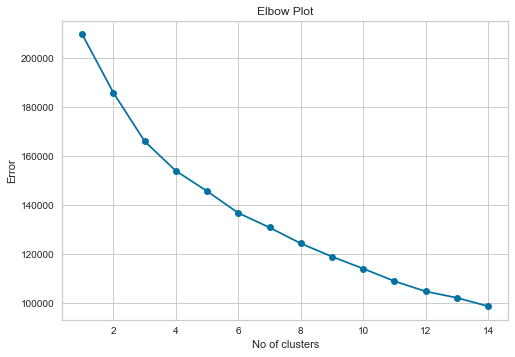

In [29]:
plt.plot(range(1,15), error, marker="o")

plt.xlabel("No of clusters")
plt.ylabel("Error")
plt.title("Elbow Plot")
plt.show()

From the above plot, k = 5

#### B.) Silhouette score

In [30]:
for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=100)
    km.fit(db_inde_sc)
    sil_score = silhouette_score(db_inde_sc, km.labels_)
    print("Silhouette score for ", i, "clusters", round(sil_score,4))

Silhouette score for  2 clusters 0.2599
Silhouette score for  3 clusters 0.2477
Silhouette score for  4 clusters 0.1967
Silhouette score for  5 clusters 0.1503
Silhouette score for  6 clusters 0.1585
Silhouette score for  7 clusters 0.1947
Silhouette score for  8 clusters 0.1637
Silhouette score for  9 clusters 0.1678


So, create a model with 2 clusters

In [31]:
model = KMeans(n_clusters=2, random_state=100)
model.fit(db_inde_sc)

KMeans(n_clusters=2, random_state=100)

In [32]:
db_inde_sc["Labels"] = model.labels_

db_inde_sc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Labels
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.894178,-0.762629,0.407786,-0.550552,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.514182,0.407786,-0.550552,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,2.058618,-0.790293,2.437081,-0.265735,0.407786,-0.550552,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.334959,0.961270,-0.207952,-0.477771,-0.017289,0.407786,-0.550552,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360,0


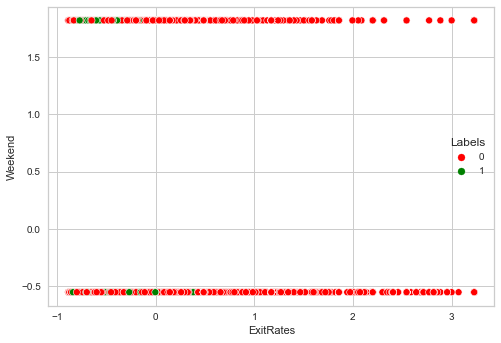

In [33]:
import seaborn as sns

sns.scatterplot(x=db_inde_sc["ExitRates"], y=db_inde_sc["Weekend"],
               hue = db_inde_sc["Labels"],
               palette=["red","green"])
plt.show()